# Combinação de Variáveis Aleatórias


___


Carregando algumas bibliotecas:

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from scipy import stats
import math

# Para ter melhor print
from IPython.display import display

___
## Índice

- [Questão 1 - Escola Infantil "Papai Sem-Noção"](#q1) 
    - [Item a](#q1_a)
    - [Item b](#q1_b)
    - [Item c](#q1_c)
- [Questão 2 - Transmissão de Dados](#q2) 
    - [Item a](#q2_a)
    - [Item b](#q2_b)
    - [Item c](#q2_c)
- [Questão 3 - Análise de Energia Solar](#q3) 
    - [Item a](#q3_a)
    - [Item b](#q3_b)
- [Questão 4](#q4) 
    - [Item a](#q4_a)
    - [Item b](#q4_b)
    - [Item c](#q4_c)
- [Questão 5 - AI e AF](#q5) 

    
___

--- 

<div id="q1"></div>

# Questão 1
Na escola infantil "Papai Sem-Noção" eles fazem coisas diferentes. No encerramento do ano vão fazer uma eco-aventura: cada dupla pai-e-filho vai descer um rio de bote inflável.

O peso dos pais pode ser modelado como uma variável aleatória normal de média $85$ kg e desvio padrão $10$ kg. O peso dos filhos pode ser modelado como uma variável normal de média $20$ kg e desvio padrão $4$ kg. Existe uma correlação entre o peso do pai e o peso do filho igual a $0,5$

---

<div id="q1_a"></div>

**a)**  Nas condições acima, a média e o desvio-padrão do peso da dupla pai-e-filho são, respectivamente, $105$ kg e $12,5$ kg. Como esses valores foram obtidos? Justifique com cálculos numéricos.

In [3]:
media_pai = 85
desvio_pai = 10
media_filho = 20
desvio_filho = 4
corr_pai_filho = 0.5

media_pai_filho = 105
desvio_pai_filho = 12.5

# como esses valores foram obtidos?
# media_pai_filho = media_pai + media_filho
# desvio_pai_filho = math.sqrt(desvio_pai**2 + desvio_filho**2 + 2*corr_pai_filho*desvio_pai*desvio_filho)
print('Média pai e filho: ', media_pai_filho, ', soma das médias')
print('Desvio pai e filho: ', desvio_pai_filho, ', raiz quadrada da soma dos desvios ao quadrado')

Média pai e filho:  105 , soma das médias
Desvio pai e filho:  12.5 , raiz quadrada da soma dos desvios ao quadrado


---

<div id="q1_b"></div>

**b)**  A escola vai comprar botes infláveis para descer o rio. Existem dois modelos:

- "Carpe Diem": cabe duas pessoas, com peso total entre $80$ kg e $115$ kg.

- "Memento Mori": cabe duas pessoas, com peso total entre $95$ kg e $120$ kg.

Qual dos dois modelos é mais adequado para a escola? Ou seja, em qual dos modelos a chance de comportar um par pai-e-filho é maior? Calcule essas chances para os dois modelos e compare.

In [6]:
#boat 1: carpe diem --> duas pessoas com peso total entre 80 e 115 kg
#boat 2: memento mori --> duas pessoas com peso total entre 95 e 120 kg

cdf = lambda x: stats.norm.cdf(x, loc=media_pai_filho, scale=desvio_pai_filho)
p_carpe = cdf(115) - cdf(80)
p_memento = cdf(120) - cdf(95)

print('Probabilidade de carpe diem: ', p_carpe*100)
print('Probabilidade de memento mori: ', p_memento*100)


Probabilidade de carpe diem:  76.53944694684242
Probabilidade de memento mori:  67.30749311948952


---

<div id="q1_c"></div>

**c)** O diretor, o sr. Joselito, teve uma ideia "brilhante": se eles colocarem "lastro" (um peso extra) nos botes para complementar o peso da dupla, eles conseguem expandir a faixa de peso util do barco. 

Com isso, o limite mínimo de peso dos barcos "Memento Mori" será compensado pelo "lastro", mas o peso total máximo ainda é de $120$ kg. Calcule o novo valor do limite inferior que permita que $85\%$ das duplas pai-e-filho participem do evento nos botes "Memento Mori".

Recapitulando:
 * O limite superior de 120 kg não tem como mudar (é fixo).
 * O limite mínimo é livre (já que podemos usar lastro para compensar o peso de duplas muito leves).
 * Queremos saber qual limite mínimo que permita que $85\%$ das duplas pai-e-filho participem do evento nos botes "Memento Mori". 

In [11]:
p_abaixo_120 = stats.norm.cdf(120, loc=media_pai_filho, scale=desvio_pai_filho)
p_abaixo_crit = p_abaixo_120 - 0.85
peso_crit = stats.norm.ppf(p_abaixo_crit, loc=media_pai_filho, scale=desvio_pai_filho)
print('Peso crítico: ', peso_crit)


Peso crítico:  82.33983679868541


---

<div id="q2"></div>

# Questão 2
## Transmissão de dados

Em um certo sistema de transmissão de dados, uma informação digital é transmitida na forma de um sinal elétrico onde uma voltagem constante de $5 V$ representa o bit $1$ e uma voltagem de $0 V$ representa o bit $0$. 

O sinal é gerado perfeitamente no ponto de transmissão; porém ao longo do caminho do sinal surgem várias interferências elétricas externas e também ruído térmico na linha de transmissão. Consequentemente, o sinal no receptor é igual ao sinal transmitido ($5 V$ para bit $1$ e $0 V$ para bit $0$) mais uma componente de ruído. 

No receptor o sinal é observado por um breve instante, e o valor de voltagem medido é comparado a um valor de referência de $3,0 V$ para decidir qual será o valor do bit *recebido*. Ou seja, se a voltagem recebida for maior que $3,0 V$, o bit é considerado $1$; caso contrário é bit $0$.

Com esse cenário nota-se que podem haver erros de transmissão. Por exemplo: se um bit $1$ for enviado, mas o ruido aleatório for de $-2,5 V$, o sinal recebido será $5 + (-2,5) = 2,5 V$, abaixo do limiar de decisão $3,0$, e portanto será identificado erroneamente como bit $0$.

Os engenheiros investigaram o ruído e concluiram que este pode ser modelado como uma variável aleatória com distribuição normal de média $0 V$ e desvio padrão $0,9 V$. Ou seja:

- O ruido é modelado por $\eta \sim N(\mu = 0, \sigma^2 = 0,81)$

- Quando um bit $0$ é enviado, o sinal elétrico que chega no receptor é $X_0 = 0 + \eta$

- Quando um bit $1$ é enviado, o sinal elétrico que chega no receptor é $X_1 = 5 + \eta$

---

<div id="q2_a"></div>

**a)**  Qual a probabilidade de que um bit $0$ transmitido seja detectado como um bit $1$? E qual a probabilidade de que um bit $1$ transmitido seja detectado como bit $0$ no receptor?

In [15]:
# n ~ N(mu = 0, sigma^2 = 0.81)
# bit 0 --> X0 = 0 + n
# bit 1 --> X1 = 5 + n

prob_1_dado_0 = 1-stats.norm.cdf(3, loc=0, scale=0.9)
prob_0_dado_1 = stats.norm.cdf(3, loc=5, scale=0.9)

print('Probabilidade de 1 dado 0: ', prob_1_dado_0*100)
print('Probabilidade de 0 dado 1: ', prob_0_dado_1*100)


Probabilidade de 1 dado 0:  0.04290603331967846
Probabilidade de 0 dado 1:  1.3134145691021117


---

<div id="q2_b"></div>

**b)**  Supondo que a probabilidade de transmissão de um bit $0$ seja de $60 \%$ qual a probabilidade de um erro de bit na transmissão?

In [16]:
# prob transmissao 0 = 60%
# prob de erro
p_trans_0 = 0.6
p_trans_1 = 1 - p_trans_0
p_erro = prob_1_dado_0 * p_trans_0 + prob_0_dado_1 * p_trans_1
print('Probabilidade de erro: ', p_erro*100)


Probabilidade de erro:  0.5511094476326518


---

<div id="q2_c"></div>

**c)**  Qual a probabilidade de que ocorram $3$ erros de bit em um pacote de $4$ bits transmitidos (com probabilidade $60\%$ de transmissão de bit $0$)?

In [19]:
p_3_erros = stats.binom.pmf(3, n=4, p=p_erro)
print('Probabilidade de 3 erros: ', p_3_erros*100)


Probabilidade de 3 erros:  6.658455511599448e-05


--- 

<div id="q3"></div>

# Questão 3
## Análise de Energia Solar

Sabe-se que a radiação solar ($Rad$) está distribuída no Brasil de acordo com uma curva normal $Rad \sim N(\mu=150, \sigma=50)$.

Uma empresa fabrica painéis solares que têm sua eficiência distribuída de acordo com uma curva normal: $\eta \sim N(\mu=0.4, \sigma=0.15)$. A potência disponível em determinada residência é chamada de potência útil ($P_{útil}$), e é o resultado da eficiência energética do painel solar adquirido e também da radiação solar disponível. Ou seja, $P_{útil} = \eta \times Rad$

---

<div id="q3_a"></div>

**a.** Construa, via simulação, a distribuição de $P_{útil}$. Apresente o histograma resultante:

(array([4.13824240e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 4.13824240e-05, 4.13824240e-05,
        4.13824240e-05, 8.27648480e-05, 8.27648480e-05, 8.27648480e-05,
        8.27648480e-05, 2.89676968e-04, 4.55206664e-04, 6.20736360e-04,
        1.07594302e-03, 1.20009030e-03, 2.27603332e-03, 2.93815211e-03,
        3.60027089e-03, 3.88994786e-03, 6.12459875e-03, 6.53842299e-03,
        5.91768663e-03, 8.77307389e-03, 9.64210480e-03, 1.07594302e-02,
        1.12560193e-02, 1.11732545e-02, 1.12974018e-02, 1.18767557e-02,
        1.32009933e-02, 1.31182284e-02, 1.22078151e-02, 1.27044042e-02,
        1.34079054e-02, 1.40700242e-02, 1.36975823e-02, 1.36148175e-02,
        1.31182284e-02, 1.31182284e-02, 1.06766654e-02, 1.14629315e-02,
        1.18353733e-02, 1.05111357e-02, 9.06275086e-03, 9.26966298e-03,
        9.39381025e-03, 9.18689813e-03, 6.95224723e-03, 7.57298359e-03,
        7.07639451e-03, 6.16598118e-03, 5.21418543e-03, 4.800361

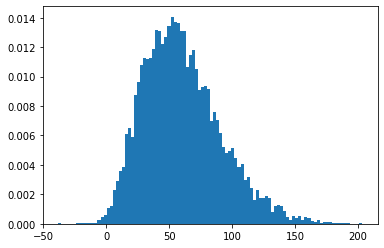

In [22]:
# Rad ~ N(mu = 150, sigma = 50)
# n ~ N(mu = 0.4, sigma = 0.15)
# Potencia = P_util = n * Rad

rad = stats.norm.rvs(loc=150, scale=50, size=10000)
ef = n = stats.norm.rvs(loc=0.4, scale=0.15, size=10000)
p_util = rad * n
#histograma
plt.hist(p_util, density=True, bins=100)


In [23]:
np.percentile(p_util, 5)

16.47346685374375

---

<div id="q3_b"></div>

**b.** A empresa de painéis solares garantiu que, se a potência útil instalada na casa dos clientes é menor que $15W/m^2$, vai pagar uma indenização. Qual a porcentagem dos clientes que vai ganhar indenização? 

In [25]:
stats.percentileofscore(p_util, 15)

4.12

---

<div id="q4"></div>

# Questão 4

<img src=distribuicoes_U_Y.png width=75%>

Seja $U$ uma variável aleatória que segue uma distribuição uniforme no intervalo $[3.0,6.0]$

Seja $Y\sim N(4.5, \sigma^2=9)$

Seja também a variável aleatória $\overline{U}$, calculada como a média de amostras de $U$ feitas com $n$  elementos independentes entre si. Assuma n=50.

Nota que a variável $\overline{U}$ **não** é mostrada no gráfico.

Vamos montar a variável aleatória $W$ :

$$W = 2\overline{U} + 3Y$$

**Responda:**

Deixe os cálculos, não coloque os valores apenas

---

<div id="q4_a"></div>

**a)** Quanto vale $E(\overline{U})$ e $Var(\overline{U})$ ?

In [29]:
## Os plots não são exigidos. Apenas nos ajudam a visualizar o problema
eixo_horizontal = np.linspace(0,10,800)
# U: uniforme entre 4 a 7
a = 3
b = 6
loc_unif = a
scale_unif = b - a
pdf_U = stats.uniform.pdf(eixo_horizontal, loc=loc_unif, scale=scale_unif)

# Y: normal N(4.5, var=8)
mu_y = 4.5
scale_y = 3
var_y = scale_y**2
pdf_Y = stats.norm.pdf(eixo_horizontal, loc=mu_y, scale=scale_y)

EU_ = (a+b)/2
VarU = (b-a)**2/12

n = 50
VarU_ = VarU/n

print('VarU: ', VarU)
print('VarU_: ', VarU_)
print('EU_: ', EU_)


VarU:  0.75
VarU_:  0.015
EU_:  4.5


---

<div id="q4_b"></div>

**b)** Quanto vale $E(W)$ e $Var(W)$? 

In [34]:
U_ = stats.norm.rvs(loc=EU_, scale=math.sqrt(VarU_), size=n)
Y = stats.norm.rvs(loc=mu_y, scale=scale_y, size=n)

W = 2*U_ + 3*Y

EW = 2*EU_ + 3*mu_y

VarW = 2**2*VarU_ + 3**2*var_y

print('EW: ', EW)
print('VarW: ', VarW)


Var_U = (b-a)**2/12
Var_U

E_W = 2*EU_+3*mu_y

n=50
Var_U_ = Var_U/n


Var_W=4*Var_U_ + 9*var_y
Var_W

dp_W = math.sqrt(Var_W)
dp_W

EW:  22.5
VarW:  81.06


9.003332716277901

---

<div id="q4_c1"></div>


**c)** Quanto vale $P(W \geq 10| W < E(W))$ ? 

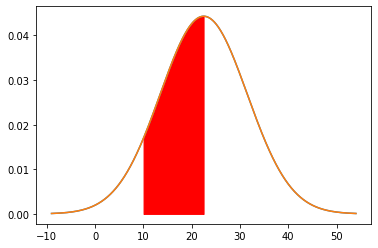

In [37]:
#P(W>=10|W < EW)
# EW = 22.5
# P(10 <= W < 22.5) / P(W < 22.5)
# W ~ N(22.5, sigma^2 = 81.06)
x = np.linspace(E_W - 3.5*dp_W, E_W + 3.5*dp_W, 1000)
pdf_W = stats.norm.pdf(x, loc=E_W, scale=dp_W)
plt.plot(x, pdf_W)
limiar=10
plt.plot(x, pdf_W)
plt.fill_between(x, pdf_W, where=(x>limiar) & (x<E_W), color='red')

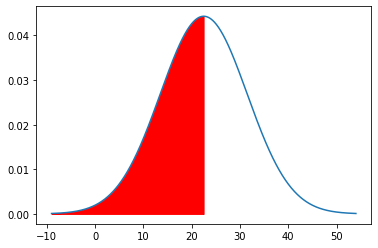

In [38]:
plt.plot(x, pdf_W)
plt.fill_between(x, pdf_W, where=x<E_W, color='red')

In [39]:
prob_menor_10 = stats.norm.cdf(10, loc=E_W, scale=dp_W)
prob_menor_20 = stats.norm.cdf(20, loc=E_W, scale=dp_W)
prob_entre_10_20 = prob_menor_20 - prob_menor_10
prob_maior_10_dado_menor_media = prob_entre_10_20 / (prob_menor_20)

prob_maior_10_dado_menor_media

0.7887738323964772

___

<div id="q5"></div>

# Questão 5

A Avaliação Intermediária de Ciência dos dados teve média 4.25 e desvio padrão 1.70.

A Avaliação Final está acontecendo agora, nesse momento, porém assuma que essa avaliação terá média igual 7.75 e desvio padrão igual 2.20.

Assuma também que ambas avaliações tenham notas com correlação de 0.35 e que qualquer combinação linear entre essas notas seja modelada por uma distribuição normal.



**Calcule a probabilidade de um aluno qualquer ter as notas das avaliações somando pelo menos 10 pontos. Discuta o que representa esse resultado.**

**Resposta:**